In [1]:
from multiprocessing import Pool
import numpy as np
import os
import pickle


def process_chunk(rank: int):
    chunk = np.memmap(
        FILE,
        dtype=np.uint16,
        mode="r",
        offset=rank * chunk_size * el_size,
        shape=chunk_size,
    )
    windows = np.lib.stride_tricks.sliding_window_view(chunk, 3)
    return np.unique(windows, return_counts=True, axis=0)

FILE = "/mnt/ssd-1/pile_preshuffled/deduped/document.bin"

# Compute number of elements in file
el_size = np.dtype(np.uint16).itemsize
numel = os.stat(FILE).st_size // el_size
numel = 2 ** 30

# Compute number of CPUs to use and chunk size
num_cpus = 16
chunk_size = numel // num_cpus
print(f"Splitting work across {num_cpus} CPUs")

with Pool(num_cpus) as p:
    results = p.map(process_chunk, list(range(num_cpus)))

    with open("results.pkl", "wb") as f:
        pickle.dump(results, f)

Splitting work across 8 CPUs


In [5]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-160m")
len(tokenizer.vocab)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


50277

In [29]:
import numpy as np

tokens = np.memmap("/mnt/ssd-1/pile_preshuffled/standard/document.bin", dtype=np.uint16, mode="r")

windows = np.lib.stride_tricks.sliding_window_view(tokens[:1000_000], 2).view(np.uint32)
windows.shape

counts = np.bincount(windows.squeeze(), minlength=2 ** 32).reshape(-1, 2 ** 16)
counts[:len(tokenizer.vocab), :len(tokenizer.vocab)].T

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
np.bincount([1, 1, 9, 10])

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [2]:
windows.shape

(99999999, 1)

In [3]:
grams, counts = np.unique(windows, return_counts=True, axis=0)

(146432000, 2048, 2)

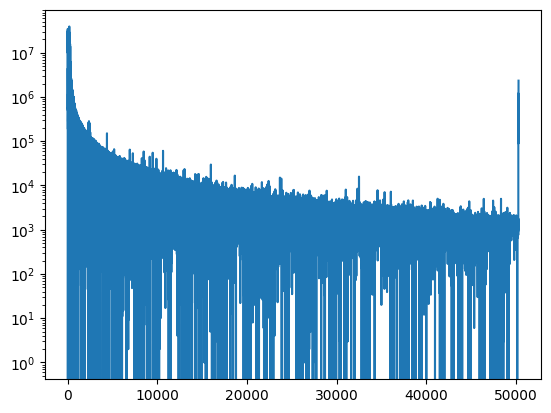

In [14]:
import matplotlib.pyplot as plt

plt.plot(np.bincount(tokens[:1000_000_000]))
plt.yscale("log")

In [6]:
from transformers import GPTNeoXTokenizerFast

tokenizer = GPTNeoXTokenizerFast.from_pretrained("EleutherAI/pythia-160m")
tokenizer.encode("Hello world")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[12092, 1533]

In [27]:
sorted(tokenizer.vocab.keys())[3000:]

['Car',
 'Card',
 'Care',
 'Career',
 'Carl',
 'Carol',
 'Cart',
 'Cas',
 'Case',
 'Cass',
 'Cast',
 'Cat',
 'Catal',
 'Categories',
 'Category',
 'Cath',
 'Cause',
 'Cd',
 'Ce',
 'Cell',
 'Cells',
 'Cent',
 'Center',
 'Central',
 'Cert',
 'Certainly',
 'Certificate',
 'Cfg',
 'Ch',
 'Cha',
 'Chain',
 'Chan',
 'Change',
 'Changed',
 'Changes',
 'Channel',
 'Chap',
 'Chapter',
 'Char',
 'Character',
 'Characteristics',
 'Charl',
 'Charles',
 'Charlie',
 'Chars',
 'Chart',
 'Chat',
 'Che',
 'Check',
 'Checked',
 'Chem',
 'Chen',
 'Cherry',
 'Chi',
 'Chicago',
 'Chief',
 'Child',
 'Children',
 'China',
 'Chinese',
 'Chip',
 'Cho',
 'Choice',
 'Choose',
 'Chris',
 'Christ',
 'Christian',
 'Chunk',
 'Church',
 'Ci',
 'Cir',
 'Circ',
 'Cit',
 'Citation',
 'City',
 'Civ',
 'Civil',
 'Cl',
 'ClCompile',
 'Cla',
 'Claim',
 'Class',
 'ClassName',
 'Classes',
 'Cle',
 'Clean',
 'Clear',
 'Clearly',
 'Cli',
 'Click',
 'ClickListener',
 'Client',
 'Clinical',
 'Clip',
 'Clock',
 'Close',
 'Closed',

In [28]:
import numpy as np

tokens = np.memmap("/mnt/ssd-1/pile_preshuffled/standard/document.bin", dtype=np.uint16, mode="r")
tokens

memmap([26514,  6901, 32579, ...,  4832,  8891,  2686], dtype=uint16)

In [7]:
from datasets import load_dataset

ds = 

ClassLabel(names=['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01882714', 'n01910747', 'n01917289', 'n01944390', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 'n02074367', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 'n02123394', 'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 'n02364673', 'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666347', 'n02669723', 'n02699494', 'n02769748', 'n02788148', 'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n02808440', 'n02814533', 'n02814860', 'n02815834', 'n02823428', 'n02837789', 'n02841315', 'n02843684', 'n02883205', 'n02892201', 'n02909870', 'n02917067', 'n02927

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/noameshed/novelty-detection/master/imagenet_categories_synset.csv")
df

,index,synset,words,categories
0,0,n01440764,"tench, Tinca tinca",fish
1,1,n01443537,"goldfish, Carassius auratus",fish
2,2,n01484850,"great white shark, white shark, man-eater, man...",shark
3,3,n01491361,"tiger shark, Galeocerdo cuvieri",shark
4,4,n01494475,"hammerhead, hammerhead shark",shark
...,...,...,...,...
995,995,n13044778,earthstar,fungus
996,996,n13052670,"hen-of-the-woods, hen of the woods, Polyporus ...",fungus
997,997,n13054560,bolete,fungus
998,998,n13133613,"ear, spike, capitulum",food


In [17]:
cifar = load_dataset("cifar")

[119,
 59,
 49,
 49,
 47,
 43,
 37,
 34,
 32,
 28,
 28,
 27,
 27,
 25,
 22,
 19,
 19,
 18,
 18,
 16,
 16,
 15,
 14,
 13,
 13,
 11,
 11,
 10,
 9,
 9,
 9,
 9,
 8,
 8,
 7,
 7,
 7,
 7,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 1]

In [8]:
lut = {k: v for k, v in zip(df.synset, df.categories)}

In [16]:
import numpy as np

np.unique([lut.get(label, 'n/a') for label in ds['train'].features['label'].names], return_counts=True)

(array(['accessory', 'arachnid', 'ball', 'bear', 'bird', 'boat', 'bug',
        'building', 'butterfly', 'cat', 'clothing', 'container', 'cooking',
        'coral', 'crocodile', 'crustacean', 'decor', 'dog', 'echinoderms',
        'electronics', 'fence', 'fish', 'food', 'frog', 'fruit',
        'furniture', 'hat', 'hog', 'instrument', 'lab equipment',
        'marine mammals', 'marsupial', 'mollusk', 'n/a', 'outdoor scene',
        'paper', 'plant', 'primate', 'rodent', 'salamander', 'snake',
        'sports equipment', 'technology', 'tool', 'toy', 'train',
        'trilobite', 'ungulate', 'vegetable', 'vehicle', 'weapon',
        'wild cat'], dtype='<U16'),
 array([ 5,  3,  3,  2,  3,  2,  7,  8,  2,  3, 13,  4,  3,  2,  1,  2,  3,
         5,  1,  8,  1,  2, 11,  2,  3,  7,  1,  1,  2,  1,  1,  1,  2, 18,
        15,  1,  1,  3,  1,  1,  1,  3,  4,  9,  1,  2,  1,  6,  2, 12,  2,
         2]))

In [10]:
from datasets import load_dataset

ds = load_dataset("zh-plus/tiny-imagenet")

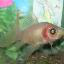

In [5]:
ds[0]['image']

In [11]:
import numpy as np

tokens = np.memmap("/mnt/ssd-1/pile_preshuffled/deduped/document.bin", dtype=np.uint16, mode="r")
windows = np.lib.stride_tricks.sliding_window_view(tokens[:2**30], 3)
grams, counts = np.unique(windows, return_counts=True, axis=0)

In [14]:
import pickle

with open("/mnt/ssd-1/nora/pythia-deduped-trigrams-1B.pkl", "wb") as f:
    pickle.dump({"grams": grams, "counts": counts}, f)

Text(0.5, 1.0, 'Frequency of trigrams in Pile (2^30 token sample)')

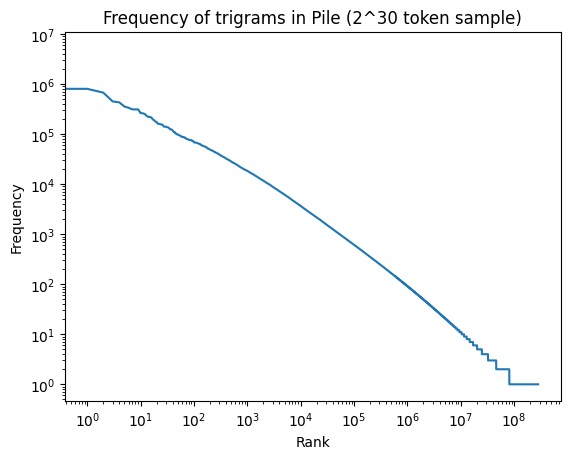

In [13]:
import matplotlib.pyplot as plt

plt.plot(np.sort(counts)[::-1])
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Frequency of trigrams in Pile (2^30 token sample)")

In [33]:
import os

FILE = "/mnt/ssd-1/pile_preshuffled/deduped/document.bin"
numel = os.stat(FILE).st_size // np.dtype(np.uint16).itemsize

300039168000